# Spotify Top 50 Tracks of 2020 Analysis

 
## 1. Introduction 


The objective of this analysis is to explore the Spotify Top 50 Tracks dataset from 2020, perform EDA, and gain insights into the characteristics of popular songs in 2020, such as artist popularity, album trends, identify popular genres, and analyze relationships between audio features like danceability, loudness, and acousticness across different genres.


## 2. Data loading


### Importing necessary libraries.


In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Loading the dataset using Pandas.

In [20]:
df = pd.read_csv(r"C:\Users\Misiaki\Desktop\Git\spotifytoptracks.xls")

In [21]:
df.head()

,Unnamed: 0,artist,album,track_name,track_id,energy,danceability,key,loudness,acousticness,speechiness,instrumentalness,liveness,valence,tempo,duration_ms,genre
0,0,The Weeknd,After Hours,Blinding Lights,0VjIjW4GlUZAMYd2vXMi3b,0.730,0.514,1,-5.934,0.00146,0.0598,0.000095,0.0897,0.334,171.005,200040,R&B/Soul
1,1,Tones And I,Dance Monkey,Dance Monkey,1rgnBhdG2JDFTbYkYRZAku,0.593,0.825,6,-6.401,0.68800,0.0988,0.000161,0.1700,0.540,98.078,209755,Alternative/Indie
2,2,Roddy Ricch,Please Excuse Me For Being Antisocial,The Box,0nbXyq5TXYPCO7pr3N8S4I,0.586,0.896,10,-6.687,0.10400,0.0559,0.000000,0.7900,0.642,116.971,196653,Hip-Hop/Rap
3,3,SAINt JHN,Roses (Imanbek Remix),Roses - Imanbek Remix,2Wo6QQD1KMDWeFkkjLqwx5,0.721,0.785,8,-5.457,0.01490,0.0506,0.004320,0.2850,0.894,121.962,176219,Dance/Electronic
4,4,Dua Lipa,Future Nostalgia,Don't Start Now,3PfIrDoz19wz7qK7tYeu62,0.793,0.793,11,-4.521,0.01230,0.0830,0.000000,0.0951,0.679,123.950,183290,Nu-disco


## 3. Data clearing

### Handling missing values.

In [22]:
df.isna().sum()

Unnamed: 0          0
artist              0
album               0
track_name          0
track_id            0
energy              0
danceability        0
key                 0
loudness            0
acousticness        0
speechiness         0
instrumentalness    0
liveness            0
valence             0
tempo               0
duration_ms         0
genre               0
dtype: int64

### Removing duplicate samples and features.

In [23]:
df.set_index('Unnamed: 0', inplace=True)
df.rename_axis('index', inplace=True)
df.head(2)

,artist,album,track_name,track_id,energy,danceability,key,loudness,acousticness,speechiness,instrumentalness,liveness,valence,tempo,duration_ms,genre
index,,,,,,,,,,,,,,,,
0,The Weeknd,After Hours,Blinding Lights,0VjIjW4GlUZAMYd2vXMi3b,0.730,0.514,1,-5.934,0.00146,0.0598,0.000095,0.0897,0.334,171.005,200040,R&B/Soul
1,Tones And I,Dance Monkey,Dance Monkey,1rgnBhdG2JDFTbYkYRZAku,0.593,0.825,6,-6.401,0.68800,0.0988,0.000161,0.1700,0.540,98.078,209755,Alternative/Indie


In [24]:
df = df.drop_duplicates()

In [25]:
df = df.loc[:, ~df.columns.duplicated()]


### Finding the outliers.

In [26]:
def find_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)][[column]]
    return outliers

In [27]:
list_columns_numbers = df.select_dtypes(include=['float64', 'int64']).columns
for column in list_columns_numbers: 
    outliers = find_outliers(df, column) 
    if outliers.empty: 
        print(f"No outliers found in {column}") 
    else: 
        print(f"Outliers in {column}:") 
        print(outliers)

No outliers found in energy
Outliers in danceability:
       danceability
index              
16            0.459
44            0.351
47            0.464
No outliers found in key
Outliers in loudness:
       loudness
index          
24      -14.454
Outliers in acousticness:
       acousticness
index              
1             0.688
7             0.731
9             0.751
18            0.837
24            0.902
44            0.934
47            0.866
Outliers in speechiness:
       speechiness
index             
19           0.487
26           0.375
27           0.375
29           0.342
38           0.389
43           0.379
Outliers in instrumentalness:
       instrumentalness
index                  
0              0.000095
1              0.000161
3              0.004320
10             0.000134
12             0.002440
24             0.657000
26             0.130000
33             0.000209
34             0.001880
39             0.000064
41             0.001090
48             0.000658
Ou



## 4. Exploratory Data Analysis (EDA)


### 4.1 Dataset Overview.

In [28]:
print(f"Number of observations: {df.shape[0]}")

Number of observations: 50


In [29]:
print(f"Number of features: {df.shape[1]}")

Number of features: 16



### 4.2 Categorical and Numeric Features.


In [30]:
categorical_features = df.dtypes[df.dtypes == 'object'].index.tolist()
print("Categorical Features:", categorical_features)

Categorical Features: ['artist', 'album', 'track_name', 'track_id', 'genre']


In [31]:
numeric_features = df.dtypes[(df.dtypes == 'int64') | (df.dtypes == 'float64')].index.tolist()
print("Numeric Features:", numeric_features)

Numeric Features: ['energy', 'danceability', 'key', 'loudness', 'acousticness', 'speechiness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms']



### 4.3 Artists Analysis.
- Identifing artists with more than one popular track.
- Determining the most popular artist.
- Counting the total number of unique artists.

In [32]:
print(f"There are artists that have more than 1 popular track: {df['artist'].duplicated().any()}")

There are artists that have more than 1 popular track: True


In [33]:
artist_counts = df['artist'].value_counts()
print(f"Artists with more than one popular track: {(artist_counts[artist_counts>1]).index.tolist()}")

Artists with more than one popular track: ['Dua Lipa', 'Billie Eilish', 'Travis Scott', 'Harry Styles', 'Lewis Capaldi', 'Justin Bieber', 'Post Malone']


In [34]:
print(f"Number of artists with multiple tracks: {len(artist_counts[artist_counts>1])}")

Number of artists with multiple tracks: 7


In [35]:
max_count = artist_counts.max()
print(f"Most popular artists: {(artist_counts[artist_counts == max_count]).index.tolist()}")

Most popular artists: ['Dua Lipa', 'Billie Eilish', 'Travis Scott']


In [36]:
artist_counts[artist_counts > 1] # optional

artist
Dua Lipa         3
Billie Eilish    3
Travis Scott     3
Harry Styles     2
Lewis Capaldi    2
Justin Bieber    2
Post Malone      2
Name: count, dtype: int64

In [37]:
print(f"Total number of artists: {len(df['artist'].unique())}")

Total number of artists: 40



### 4.4 Albums Analysis.
- Identifying albums with more than one popular tracks. 
- Counting the total number of unique albums.


In [38]:
print(f"There are albums that have more than 1 popular track: {df['album'].duplicated().any()}")

There are albums that have more than 1 popular track: True


In [39]:
album_counts = df['album'].value_counts()
print(f"Albums with more than one popular track: {(album_counts[album_counts>1]).index.tolist()}")

Albums with more than one popular track: ['Future Nostalgia', "Hollywood's Bleeding", 'Fine Line', 'Changes']


In [40]:
print(f"Number of albums with multiple tracks: {len(album_counts[album_counts>1])}")

Number of albums with multiple tracks: 4


In [41]:
album_counts[album_counts>1] #optional

album
Future Nostalgia        3
Hollywood's Bleeding    2
Fine Line               2
Changes                 2
Name: count, dtype: int64

In [42]:
print(f"Total number of albums: {len(df['album'].unique())}")

Total number of albums: 45



### 4.5 Tracks Analysis.
#### Analyzing tracks with danceability scores above 0.7 and below 0.4.

In [62]:
high_danceability_tracks = df[df['danceability'] > 0.7]
print("Tracks with Danceability > 0.7:")
print(high_danceability_tracks[['track_name', 'danceability']])

Tracks with Danceability > 0.7:
                                          track_name  danceability
index                                                             
1                                       Dance Monkey         0.825
2                                            The Box         0.896
3                              Roses - Imanbek Remix         0.785
4                                    Don't Start Now         0.793
5                       ROCKSTAR (feat. Roddy Ricch)         0.746
7                   death bed (coffee for your head)         0.726
8                                            Falling         0.784
10                                              Tusa         0.803
13                                   Blueberry Faygo         0.774
14                          Intentions (feat. Quavo)         0.806
15                                      Toosie Slide         0.830
17                                            Say So         0.787
18                            

In [63]:
low_danceability_tracks = df[df['danceability'] < 0.4]
print("Tracks with Danceability < 0.4:")
print(low_danceability_tracks[['track_name', 'danceability']])

Tracks with Danceability < 0.4:
                 track_name  danceability
index                                    
44     lovely (with Khalid)         0.351


#### Analyzing tracks with loudness above -5 and below -8.

In [45]:
loud_tracks = df[df['loudness'] > -5]
print("Tracks with Loudness > -5:")
print(loud_tracks[['track_name', 'loudness']])

Tracks with Loudness > -5:
                                          track_name  loudness
index                                                         
4                                    Don't Start Now    -4.521
6                                   Watermelon Sugar    -4.209
10                                              Tusa    -3.280
12                                           Circles    -3.497
16                                     Before You Go    -4.858
17                                            Say So    -4.577
21                                         Adore You    -3.675
23                            Mood (feat. iann dior)    -3.558
31                                    Break My Heart    -3.434
32                                          Dynamite    -4.410
33                  Supalonely (feat. Gus Dapperton)    -4.746
35                   Rain On Me (with Ariana Grande)    -3.764
37     Sunflower - Spider-Man: Into the Spider-Verse    -4.368
38                          

In [46]:
quiet_tracks = df[df['loudness'] < -8]
print("Tracks with Loudness < -8:")
print(quiet_tracks[['track_name', 'loudness']])

Tracks with Loudness < -8:
                                           track_name  loudness
index                                                          
7                    death bed (coffee for your head)    -8.765
8                                             Falling    -8.756
15                                       Toosie Slide    -8.820
20                   Savage Love (Laxed - Siren Beat)    -8.520
24                                everything i wanted   -14.454
26                                            bad guy   -10.965
36                                HIGHEST IN THE ROOM    -8.764
44                               lovely (with Khalid)   -10.109
47     If the World Was Ending - feat. Julia Michaels   -10.086


#### Identifying the longest and shortest tracks.

In [65]:
print(f"The longest track: {df.loc[df['duration_ms'].idxmax(), 'track_name']}")

The longest track: SICKO MODE


In [48]:
print(f"The shortest track: {df.loc[df['duration_ms'].idxmin(), 'track_name']}")

The shortest track: Mood (feat. iann dior)



### 4.6 Genre Analysis.
- Finding the most popular genre.
- Identifying genres which has more that 2 tracks in top 50. 
- Finding genres with just one song in the top 50. 
- Counting the total number of genres.


In [49]:
genre_counts = df['genre'].value_counts()
most_popular_genre = genre_counts.idxmax()
print(f"Most popular genre: {most_popular_genre}")

Most popular genre: Pop


In [50]:
most_popular_genres = genre_counts[genre_counts>2]
print(f"Most popular genres: \n{most_popular_genres}")

Most popular genres: 
genre
Pop                  14
Hip-Hop/Rap          13
Dance/Electronic      5
Alternative/Indie     4
Name: count, dtype: int64


In [51]:
genres_one_song = genre_counts[genre_counts==1]
print(f"Genres with only one song:\n{genres_one_song}")

Genres with only one song:
genre
R&B/Hip-Hop alternative               1
Nu-disco                              1
Pop/Soft Rock                         1
Pop rap                               1
Hip-Hop/Trap                          1
Dance-pop/Disco                       1
Disco-pop                             1
Dreampop/Hip-Hop/R&B                  1
Alternative/reggaeton/experimental    1
Chamber pop                           1
Name: count, dtype: int64


In [52]:
print(f"Total number of genres in the top 50: {len(df['genre'].unique())}")

Total number of genres in the top 50: 16



### 4.7 Correlation Analysis
- Identifing strongly positively and negatively correlated features. 
- Identifing features that are not correlated.

In [53]:
data = df.drop(categorical_features, axis=1)
matrix = data.corr()
matrix

,energy,danceability,key,loudness,acousticness,speechiness,instrumentalness,liveness,valence,tempo,duration_ms
energy,1.000000,0.152552,0.062428,0.791640,-0.682479,0.074267,-0.385515,0.069487,0.393453,0.075191,0.081971
danceability,0.152552,1.000000,0.285036,0.167147,-0.359135,0.226148,-0.017706,-0.006648,0.479953,0.168956,-0.033763
key,0.062428,0.285036,1.000000,-0.009178,-0.113394,-0.094965,0.020802,0.278672,0.120007,0.080475,-0.003345
loudness,0.791640,0.167147,-0.009178,1.000000,-0.498695,-0.021693,-0.553735,-0.069939,0.406772,0.102097,0.064130
acousticness,-0.682479,-0.359135,-0.113394,-0.498695,1.000000,-0.135392,0.352184,-0.128384,-0.243192,-0.241119,-0.010988
speechiness,0.074267,0.226148,-0.094965,-0.021693,-0.135392,1.000000,0.028948,-0.142957,0.053867,0.215504,0.366976
instrumentalness,-0.385515,-0.017706,0.020802,-0.553735,0.352184,0.028948,1.000000,-0.087034,-0.203283,0.018853,0.184709
liveness,0.069487,-0.006648,0.278672,-0.069939,-0.128384,-0.142957,-0.087034,1.000000,-0.033366,0.025457,-0.090188
valence,0.393453,0.479953,0.120007,0.406772,-0.243192,0.053867,-0.203283,-0.033366,1.000000,0.045089,-0.039794
tempo,0.075191,0.168956,0.080475,0.102097,-0.241119,0.215504,0.018853,0.025457,0.045089,1.000000,0.130328


In [54]:
strong_positive_corr = matrix[(matrix>0.7)&(matrix<1)]
strong_positive_corr = strong_positive_corr.dropna(how='all').dropna(axis=1, how='all')
print(f"Features with strong positive correlation:\n{strong_positive_corr}")

Features with strong positive correlation:
           energy  loudness
energy        NaN   0.79164
loudness  0.79164       NaN


In [55]:
stron_negative_corr = matrix[(matrix<-0.7)]
stron_negative_corr = stron_negative_corr.dropna(how='all').dropna(axis=1, how='all')
print(f"Features with strong negative correlation:\n{stron_negative_corr}")

Features with strong negative correlation:
Empty DataFrame
Columns: []
Index: []


In [56]:
no_correlation = matrix[(matrix<0.1)&(matrix>-0.1)]
no_correlation = no_correlation.dropna(how='all').dropna(axis=1, how='all')
print("Features that are not correlated ")
no_correlation

Features that are not correlated 


,energy,danceability,key,loudness,acousticness,speechiness,instrumentalness,liveness,valence,tempo,duration_ms
energy,NaN,NaN,0.062428,NaN,NaN,0.074267,NaN,0.069487,NaN,0.075191,0.081971
danceability,NaN,NaN,NaN,NaN,NaN,NaN,-0.017706,-0.006648,NaN,NaN,-0.033763
key,0.062428,NaN,NaN,-0.009178,NaN,-0.094965,0.020802,NaN,NaN,0.080475,-0.003345
loudness,NaN,NaN,-0.009178,NaN,NaN,-0.021693,NaN,-0.069939,NaN,NaN,0.064130
acousticness,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.010988
speechiness,0.074267,NaN,-0.094965,-0.021693,NaN,NaN,0.028948,NaN,0.053867,NaN,NaN
instrumentalness,NaN,-0.017706,0.020802,NaN,NaN,0.028948,NaN,-0.087034,NaN,0.018853,NaN
liveness,0.069487,-0.006648,NaN,-0.069939,NaN,NaN,-0.087034,NaN,-0.033366,0.025457,-0.090188
valence,NaN,NaN,NaN,NaN,NaN,0.053867,NaN,-0.033366,NaN,0.045089,-0.039794
tempo,0.075191,NaN,0.080475,NaN,NaN,NaN,0.018853,0.025457,0.045089,NaN,NaN



## 5. Genre Comparison
- Compare danceability, loudness, and acousticness scores between Pop, Hip-Hop/Rap, Dance/Electronic, and Alternative/Indie genres.

In [57]:
genres_of_interest = ['Pop', 'Hip-Hop/Rap', 'Dance/Electronic', 'Alternative/Indie']
filtered_df = df[df['genre'].isin(genres_of_interest)]
average_data = filtered_df.groupby('genre')[['danceability', 'loudness', 'acousticness']].mean()
average_data

,danceability,loudness,acousticness
genre,,,
Alternative/Indie,0.661750,-5.421000,0.583500
Dance/Electronic,0.755000,-5.338000,0.099440
Hip-Hop/Rap,0.765538,-6.917846,0.188741
Pop,0.677571,-6.460357,0.323843


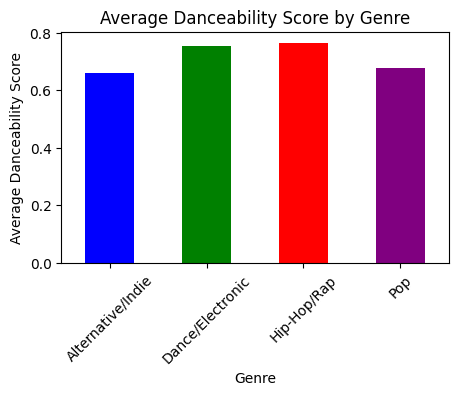

In [99]:
plt.figure(figsize=(5, 3))
average_data['danceability'].plot(kind='bar', color=['blue', 'green', 'red', 'purple'])
plt.title('Average Danceability Score by Genre')
plt.xlabel('Genre')
plt.ylabel('Average Danceability Score')
plt.xticks(rotation=45)
plt.show()

Hip-Hop/Rap (0.766) has the highets danceability and Dance/Electronic (0.755) is close second. These genres represents tracks with purpose for dancing, parties and clubs.
Pop (0.678) is fairly high indicator and also quite danceable, maybe in variuos ways.
Alternative/Indie (0.662) is lower but still quite davceable, poropably represents more relaxed music.

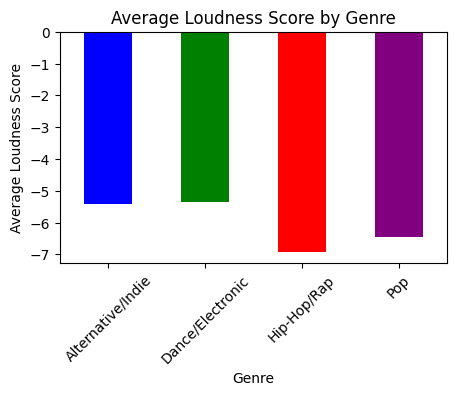

In [58]:
plt.figure(figsize=(5, 3))
average_data['loudness'].plot(kind='bar', color=['blue', 'green', 'red', 'purple'])
plt.title('Average Loudness Score by Genre')
plt.xlabel('Genre')
plt.ylabel('Average Loudness Score')
plt.xticks(rotation=45)
plt.show()

Dance/Electronic (-5.34) is generally loud aimed more for clubs and live events.
Alternative/Indie (-5.42) is very silimilar to Dance/Electronic, these track are quite loud and energetic.
Pop (-6.46) is slighty quieter that previuos, but still quite loud.
Hip-Hop/Rap (-6.92 dB) is the least loud, maybe because of focusing on lyrical content.

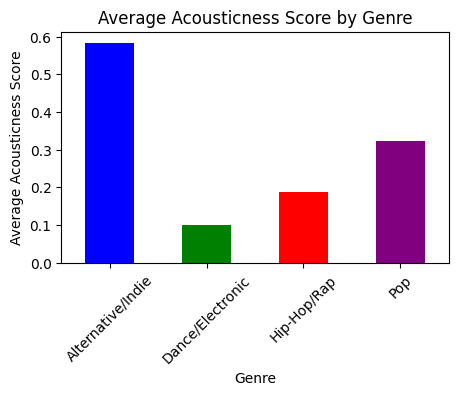

In [59]:
plt.figure(figsize=(5, 3))
average_data['acousticness'].plot(kind='bar', color=['blue', 'green', 'red', 'purple'])
plt.title('Average Acousticness Score by Genre')
plt.xlabel('Genre')
plt.ylabel('Average Acousticness Score')
plt.xticks(rotation=45)
plt.show()

Alternative/Indie (0.584) has very high acousticnes comparet with other selected genres, suggesting a more organic, less processed sound.
Pop (0.324) has moderate acousticnes, suggesting a balance between electronic and acoustic instrumentation.
Hip-Hop/Rap (0.189) is less acoustic, emphasising electronic beats and production.
Dance/Electronic (0.099) is the least acoustic, which is expected for this genre.

## 6. Conclusion

### 6.1 Summary of Findings:

- While Pop genre is most popular it has no maximum values in analysed features: danceability, loudness and acousticness, but has second or third biggest average values.

- This dataset only includes the 50 most popular tracks. The analysis suggests that tracks in the Pop and Hip-Hop/Rap genres were very popular in 2020. It also indicates that tracks in the Dance/Electronic and Alternative/Indie genres might have a higher likelihood of being a hit compared to other genres.

- We observe that Dua Lipa, Billie Eilish, and Travis Scott are among the most popular artists with 3 tracks each in the top 50. While past success can indicate future popularity, predicting the success of new tracks from these artists will depend on various factors beyond their previous achievements.


### 6.2 Suggestions for Improvement:

- Collecting more data from different years to see if trends hold over time.
- Further analysis could include more visualizations.
- More sophisticated outlier detection and handling methods can be explored.
- Using advanced statistical methods or machine learning models for deeper insights.
- Analyzing additional features such as tempo, valence and speechiness. 


## 7. License 
- Project author Francišek Verkovski, 2024
- This project is licensed under the MIT License.